In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV

In [131]:
df=pd.read_csv("secom_rf.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [132]:
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.212406,-0.330435,0.50,1.962264,1.638889,0.375,-0.078431,-2.545642,-1.569231,...,-0.663565,0.732305,0.625072,-0.285223,0.129719,-2.466145,-0.251416,-0.373801,-0.957169,-0.421141
1,0,0.933964,-1.321739,-1.00,-1.088534,1.555556,0.250,-0.078431,0.796287,-0.246154,...,-0.725669,0.092770,0.267370,-0.513746,-0.052275,-1.195242,-0.113250,-0.968189,1.900498,-0.265101
2,0,-0.257246,-0.321739,-0.50,-1.011611,1.166667,0.375,0.745098,-0.498195,-0.230769,...,-1.160797,-1.907230,-0.787461,0.929553,-1.854792,1.513788,0.475651,0.168939,-0.887422,-0.327181
3,0,0.226982,-0.660870,1.00,1.013062,1.555556,0.250,-0.078431,-0.824136,-0.692308,...,-1.318298,-1.825834,-0.179105,-0.529210,-0.164569,0.503754,-0.260476,0.037943,0.297121,-0.280201
4,0,-0.729791,0.443478,-0.50,0.387518,1.361111,0.750,0.078431,-2.682826,0.307692,...,-1.155706,1.011375,0.230816,0.115120,-1.471442,0.584022,0.323896,-1.045228,0.363048,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.50,0.767779,-0.194444,0.625,-0.431373,-1.112945,0.100000,...,0.360869,-0.089400,-0.643857,0.809278,0.021297,-0.191898,-0.480181,-0.982760,-1.714807,-0.577181
1563,1,0.457747,-0.539130,2.50,-0.635704,1.055556,0.625,-0.470588,-0.846828,0.538462,...,0.381210,9.216801,-0.395816,2.130584,0.168441,0.456932,0.169875,-0.162880,1.015825,-0.671141
1564,1,-0.667594,-0.373913,0.00,-0.341074,-0.361111,-0.500,0.431373,-0.157813,0.930769,...,0.073369,-0.050640,-0.578583,0.728522,0.040658,0.831514,-0.070215,0.615163,2.276824,0.500000
1565,1,1.795160,-0.530435,0.75,0.557329,0.416667,-0.750,0.666667,-1.129448,0.930769,...,2.833710,0.666414,-0.544641,-0.587629,0.363988,0.309774,-1.832390,-1.297410,-1.327305,0.686242


In [133]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

In [135]:
from sklearn.model_selection import train_test_split

## SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 165) (1096,)

오버샘플링 후 : (2046, 165) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


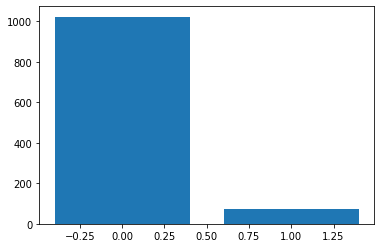

In [137]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


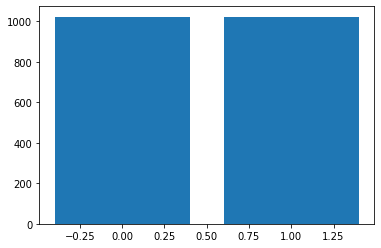

In [138]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [139]:
df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.343366,0.391304,0.000000,0.152395,-1.361111,1.000000,1.137255,-0.738525,0.861538,...,-0.428074,-0.701803,0.021939,-0.451890,0.193611,-0.205276,1.080408,0.245113,0.865709,-0.983221
1,0,0.906481,-0.408696,-0.250000,1.847605,-0.305556,0.500000,-0.823529,-0.174317,-0.015385,...,-0.340757,-1.035137,-0.669967,-0.305842,0.606002,0.416798,-1.329558,0.639111,0.341125,-0.562081
2,0,-0.337691,0.478261,-1.000000,-0.211901,-1.388889,0.625000,-0.627451,-0.230015,0.969231,...,0.293107,0.197422,-0.320098,0.309278,0.445305,-1.028018,2.724802,-0.078627,0.079886,-0.624161
3,0,-1.402392,-0.573913,-0.750000,0.573295,-1.055556,0.000000,-0.588235,1.817432,0.784615,...,4.482161,-0.628160,-0.474145,0.345361,-0.712488,0.697734,0.314836,0.482147,0.322729,-0.015101
4,0,0.654131,-0.608696,0.750000,0.120464,0.472222,-0.125000,0.823529,-0.064982,0.576923,...,-0.915013,1.026879,-0.202604,0.451890,1.053243,-0.031363,-0.158550,0.337589,1.241406,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1,-0.395013,0.375856,1.204716,-0.510650,0.111042,-0.015199,-0.602737,0.342488,-0.087002,...,-0.042462,0.416986,1.054534,-0.573234,-0.662460,0.965377,-0.755045,1.199686,0.625099,0.019677
2042,1,-1.065365,-0.900569,-0.065713,-0.885733,1.575001,0.024642,0.557083,0.561636,-1.725144,...,-0.385427,-0.894131,-1.624273,-0.634148,-1.753837,-0.215403,-0.862391,-0.271356,0.471702,-0.065393
2043,1,0.840955,0.771196,0.379486,-0.439670,0.643092,0.639427,-0.059831,-0.219884,0.389249,...,1.465907,0.629075,1.219895,0.061725,0.626540,1.558864,-0.360405,-0.414143,0.783666,-0.690130
2044,1,-0.752992,0.612599,0.172901,1.107059,1.105938,-0.240649,-1.705734,0.139105,-0.145190,...,-0.677342,0.148169,1.142334,-0.369288,0.528939,-1.917435,-0.310783,-0.218856,0.571451,0.118362


In [140]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1432, 165) (614, 165) (1432, 1) (614, 1)


In [143]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
param_grid = {
    'max_depth' : [2,3,4],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}

grid_search = GridSearchCV(tree, param_grid, cv=5)

grid_search.fit(train_x, train_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [144]:
print('test accuracy : ', grid_search.score(test_x, test_y))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.9185667752442996
parameters :  {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [145]:
print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.95
검증용 데이터셋 정확도 : 0.92


In [146]:
from sklearn.metrics import classification_report
y_pred=grid_search.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       307
           1       0.91      0.93      0.92       307

    accuracy                           0.92       614
   macro avg       0.92      0.92      0.92       614
weighted avg       0.92      0.92      0.92       614



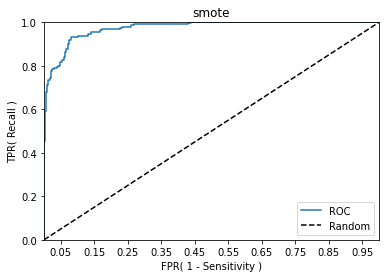

In [147]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, grid_search.predict_proba(test_x)[:, 1] )

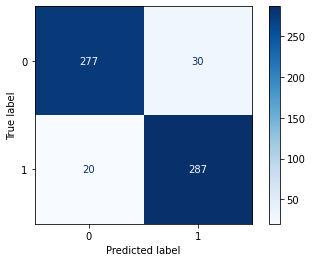

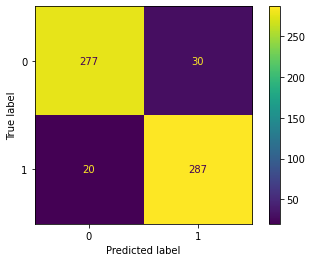

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y,y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [149]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({0: 1023, 1: 1015})
오버샘플링 전 : (1096, 165) (1096,)

오버샘플링 후 : (2038, 165) (2038,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1015
dtype: int64


In [150]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.343366,0.391304,0.000000,0.152395,-1.361111,1.000000,1.137255,-0.738525,0.861538,...,-0.428074,-0.701803,0.021939,-0.451890,0.193611,-0.205276,1.080408,0.245113,0.865709,-0.983221
1,0,0.906481,-0.408696,-0.250000,1.847605,-0.305556,0.500000,-0.823529,-0.174317,-0.015385,...,-0.340757,-1.035137,-0.669967,-0.305842,0.606002,0.416798,-1.329558,0.639111,0.341125,-0.562081
2,0,-0.337691,0.478261,-1.000000,-0.211901,-1.388889,0.625000,-0.627451,-0.230015,0.969231,...,0.293107,0.197422,-0.320098,0.309278,0.445305,-1.028018,2.724802,-0.078627,0.079886,-0.624161
3,0,-1.402392,-0.573913,-0.750000,0.573295,-1.055556,0.000000,-0.588235,1.817432,0.784615,...,4.482161,-0.628160,-0.474145,0.345361,-0.712488,0.697734,0.314836,0.482147,0.322729,-0.015101
4,0,0.654131,-0.608696,0.750000,0.120464,0.472222,-0.125000,0.823529,-0.064982,0.576923,...,-0.915013,1.026879,-0.202604,0.451890,1.053243,-0.031363,-0.158550,0.337589,1.241406,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1,0.534642,-0.734128,1.214602,0.156672,0.154130,0.186947,-0.235988,0.526610,-0.419401,...,2.502799,-0.142017,-1.029564,0.179318,-0.078387,0.554129,-0.212169,0.195800,0.448155,-0.160242
2034,1,0.530431,-0.505457,1.091718,-0.014902,0.399898,0.401994,0.033875,0.507091,-0.139603,...,2.615457,0.186627,-0.872991,0.127799,0.072929,0.659341,-0.563426,-0.147174,0.470062,-0.390341
2035,1,-0.020081,-0.385950,0.456404,-0.284904,-0.080425,0.181685,-0.384860,0.806802,-0.674417,...,1.045386,-0.016976,-0.881670,-0.264780,-0.006958,0.272055,0.282410,0.543665,-0.045863,-0.186026
2036,1,0.509678,1.069324,0.327372,-0.711176,0.672790,1.047628,-0.313725,0.131587,0.145839,...,1.102592,0.550050,1.611312,0.281348,0.653283,1.881534,0.133516,-0.074507,1.437874,-1.087797


In [151]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1426, 165) (612, 165) (1426, 1) (612, 1)


In [153]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
param_grid = {
    'max_depth' : [2,3,4],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}

grid_search = GridSearchCV(tree, param_grid, cv=5)

grid_search.fit(train_x, train_y.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [154]:
print('test accuracy : ', grid_search.score(test_x, test_y))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.8986928104575164
parameters :  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [155]:
print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.95
검증용 데이터셋 정확도 : 0.90


In [156]:
from sklearn.metrics import classification_report
y_pred=grid_search.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       307
           1       0.91      0.89      0.90       305

    accuracy                           0.90       612
   macro avg       0.90      0.90      0.90       612
weighted avg       0.90      0.90      0.90       612



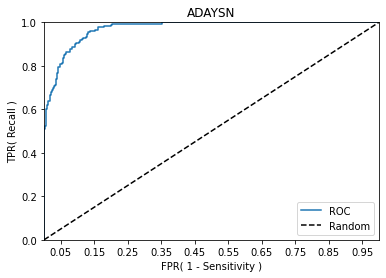

In [157]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('ADAYSN')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, grid_search.predict_proba(test_x)[:, 1] )

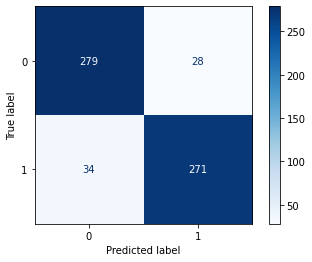

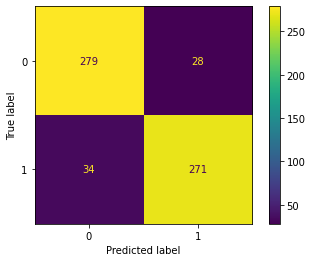

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y,y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid_search.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()